In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
    data_X = [
         [1.3, 6],
         [3.5, 5],
         [4.2, 2],
         [5, 3.3],
         [2, 9],
         [5, 7.5],
         [7.2, 4 ],
         [8.1, 8],
         [9, 2.5]
    ]

In [4]:
data_y = [0,0,0,0,1,1,1,1,1]

In [5]:
X_train = np.array(data_X)
y_train = np.array(data_y)

In [6]:
y_train == 0

array([ True,  True,  True,  True, False, False, False, False, False])

In [7]:
X_train[y_train ==0]

array([[1.3, 6. ],
       [3.5, 5. ],
       [4.2, 2. ],
       [5. , 3.3]])

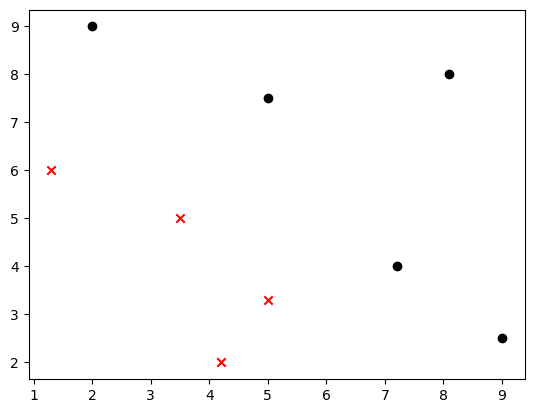

In [8]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='red', marker='x')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='black', marker='o')
plt.show()

In [38]:
data_new = np.array([4,5])
data_new

array([4, 5])

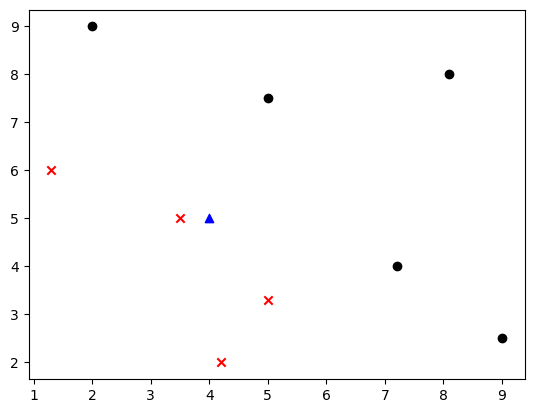

In [10]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='red', marker='x')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='black', marker='o')
plt.scatter(data_new[0], data_new[1],color='b', marker='^')
plt.show()

1.计算新样本与已知样本的距离

In [11]:
for data in X_train:
    #new data 就是在上面定义的[4,5]
    #data 就是X_train里面每一个点
    #(data-data_new) 两个向量相减 平方 求和，然后开方就得到了距离
    print(np.sqrt(np.sum((data-data_new)**2)))

2.879236009777594
0.5
3.006659275674582
1.9723082923316022
4.47213595499958
2.692582403567252
3.3526109228480423
5.080354318352215
5.5901699437494745


In [12]:
distances = [np.sqrt(np.sum((data - data_new)**2)) for data in X_train]
distances

[2.879236009777594,
 0.5,
 3.006659275674582,
 1.9723082923316022,
 4.47213595499958,
 2.692582403567252,
 3.3526109228480423,
 5.080354318352215,
 5.5901699437494745]

2. 按距离排序

In [13]:
np.sort(distances)

array([0.5       , 1.97230829, 2.6925824 , 2.87923601, 3.00665928,
       3.35261092, 4.47213595, 5.08035432, 5.59016994])

In [15]:
sort_index = np.argsort(distances)
sort_index

array([1, 3, 5, 0, 2, 6, 4, 7, 8], dtype=int64)

3. 确定k值

In [19]:
k =5

4. 距离最近的k个点投票

In [22]:
#拿到排序后的index 数列  然后 用index 拿到对应的 类别
first_k =  [y_train[i] for i in sort_index[0:k]]
first_k

[0, 0, 1, 0, 0]

In [25]:
#使用Count 进行计数
from collections import Counter 
#对数列元素  自动 计数
Counter(first_k)

Counter({0: 4, 1: 1})

In [26]:
#数列转成元组
Counter(first_k).most_common()

[(0, 4), (1, 1)]

In [28]:
#most_common(1) 筛选为最开始的数组
Counter(first_k).most_common(1)

[(0, 4)]

In [29]:
#Counter(first_k).most_common(1)=[(0, 4)]
#Counter(first_k).most_common(1)[0]=(0, 4)
#Counter(first_k).most_common(1)[0][0]=0
predict_y  = Counter(first_k).most_common(1)[0][0]
predict_y

0

# scikit-learn中的KNN算法

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
kNN_classifier = KNeighborsClassifier(n_neighbors=5)

In [34]:
#kNN_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
# data_new  array([4, 5])

data_new.reshape(1,-1)

array([[4, 5]])

In [39]:
predict_y = kNN_classifier.predict(data_new.reshape(1,-1))
predict_y

array([0])